In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/international-airline-passengers.csv",parse_dates=["Month"],index_col=["Month"])
df.head()

,International_Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
#Checking the data types of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   International_Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
#Checking if there are any missing values are present in the data

In [ ]:
df.isna().sum()

International_Passengers    0
dtype: int64

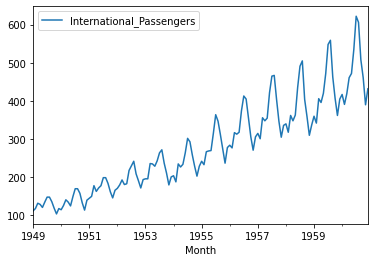

In [ ]:
df.plot()

In [ ]:
#Checking the stationarity of data

In [ ]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df.International_Passengers)
p_val = res[1]
if p_val > 0.05:
  print("Not Stationary")
else:
  print("Stationary")

Not Stationary


In [ ]:
#Given Data is Not Stationary so we have to apply differencing on the data

In [ ]:
df = df.diff().diff()

In [ ]:
df.head()

,International_Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0


In [ ]:
df = df.dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df.International_Passengers)
p_val = res[1]
if p_val > 0.05:
  print("Not Stationary")
else:
  print("Stationary")

Stationary


#AutoRegression

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

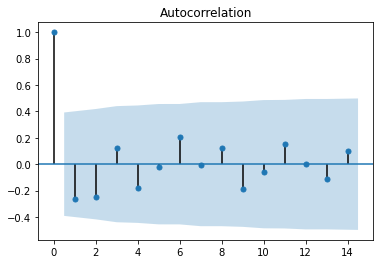

In [ ]:
fig = plot_acf(df.International_Passengers)

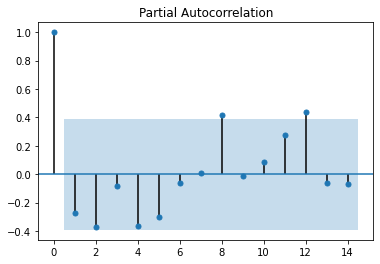

In [ ]:
fig = plot_pacf(df.International_Passengers)

#Applying AR model on data

In [ ]:
from statsmodels.tsa.ar_model import AR
x = df.International_Passengers
model = AR(x)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
print("Lag value selected by model :",model_fit.k_ar)

Lag value selected by model : 13


In [ ]:
print(model_fit.params)

const                           0.313498
L1.International_Passengers    -1.342644
L2.International_Passengers    -1.425071
L3.International_Passengers    -1.387251
L4.International_Passengers    -1.452888
L5.International_Passengers    -1.391014
L6.International_Passengers    -1.451045
L7.International_Passengers    -1.423174
L8.International_Passengers    -1.554630
L9.International_Passengers    -1.471749
L10.International_Passengers   -1.550446
L11.International_Passengers   -1.454301
L12.International_Passengers   -0.500157
L13.International_Passengers   -0.003578
dtype: float64


In [ ]:
ypred = model_fit.predict()

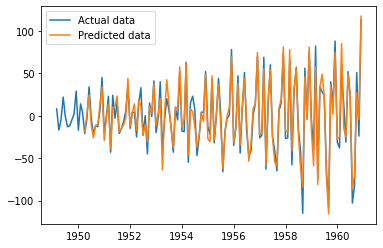

In [ ]:
plt.plot(x,label="Actual data")
plt.plot(ypred,label="Predicted data")
plt.legend()